In [1]:
# Avacado Project

In [2]:
# Problem Statement:
# Avocado is a fruit consumed by people heavily in the United States. 

#Content
#This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
#The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
#Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
#The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#Some relevant columns in the dataset:

#Date - The date of the observation
#AveragePrice - the average price of a single avocado
#type - conventional or organic
#year - the year
#Region - the city or region of the observation
#Total Volume - Total number of avocados sold
#4046 - Total number of avocados with PLU 4046 sold
#4225 - Total number of avocados with PLU 4225 sold
#4770 - Total number of avocados with PLU 4770 sold

#Inspiration /Label 

#The dataset can be seen in two angles to find the region and find the average price .
#The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.

In [3]:
# First of all import all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [6]:
#Importing Dataset and Data Information

In [6]:
df=pd.read_csv('C:\\Users\\lenovo\\Downloads\\avocado.csv')

In [7]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
#as we drop index column beacuse it just kind of id which have no effect on dataset
df.drop('Unnamed: 0',inplace=True,axis=1)

In [9]:
#checking the total rows and total columns
df.shape

(18249, 13)

In [ ]:
# we have 18249 rows and 13 columns

In [19]:
# Understanding Dataset

In [20]:
# Features:

#Date - The date of the observation
#type - conventional or organic
#year - the year
#Total Volume - Total number of avocados sold
#4046 - Total number of avocados with PLU 4046 sold
#4225 - Total number of avocados with PLU 4225 sold
#4770 - Total number of avocados with PLU 4770 sold
#Small Bags- Small size bags
#Large Bags- Large size bags
#XL Bags- Extra Large size bags
#Total Bags- Total no of Bags


#Target Variable:

#AveragePrice - the average price of a single avocado
#Region - the city or region of the observation

In [21]:
# Reviewing Data Set at initial stage, found Target variable data is 'Average Price' and 'Region'.

In [10]:
# checking the columns index present in dataset
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [11]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [25]:
# here we can see 3 columns i.e Date, type and region are object data columns and rest other 10 columns are float datatype

In [12]:
# no. of rows and coloumns
df.shape

(18249, 13)

In [27]:
# here we have 18249 rows and 13 columns in dataset

In [13]:
#Extract the Month from DOB into separate column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [14]:
#Extract the Date from DOB into separate column
df['Date'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [293]:
#checking the value counts of each date
df.Date.value_counts()

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Date, dtype: int64

In [15]:
#checking the value counts of each type
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [16]:
#co relation of total volume to total bag
df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [17]:
#checking the average year of volume of avacado per year
df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [18]:
#checking the organic type of avacado 
organic = df[df['type'] == 'organic']
organic

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12
9127,20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12
9128,13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12
9129,6,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12
9130,29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [19]:
#checking the mean of price at each year of organic type of avacado
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

In [20]:
#finding how much type of avacado is sold in last 4 year
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [21]:
#total no of sale in each year of  4 years
df.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


<AxesSubplot:>

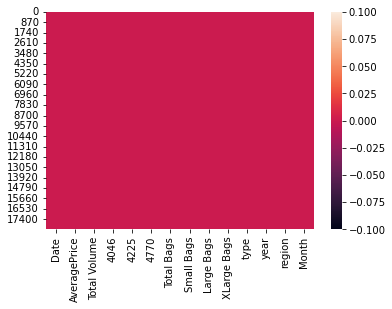

In [23]:
#checking null values using heatmap
sns.heatmap(df.isnull())

In [24]:
# checking for null values in dataframe
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
dtype: int64

In [64]:
# There are no null or missing values in data set

In [25]:
# check the statestics of dataset
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


In [66]:
# here we can see the count,mean,std deviation,min,max,1st,2nd and 3rd quartile value of each column.
# Above statatics data show that there multiple outliers mostly in XLargeBags.
# There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

In [67]:
# Data Visualization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

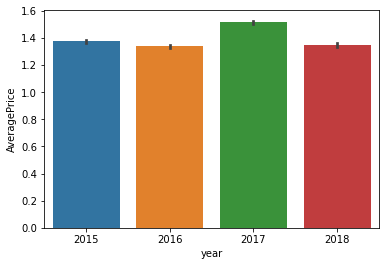

In [26]:
#checking ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )

In [69]:
#from the above graph we can see that 2017 year is that year where max average price is there

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

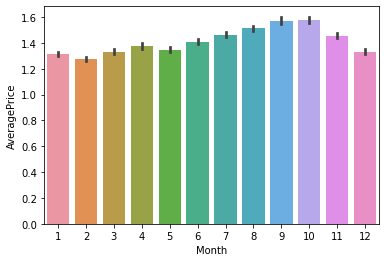

In [27]:
#checking ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df )

In [71]:
# from the above graph we can see that sept and october is the month where max no of average price is there

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

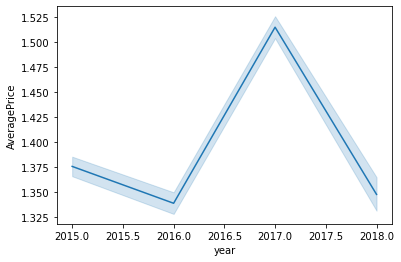

In [33]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=df)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

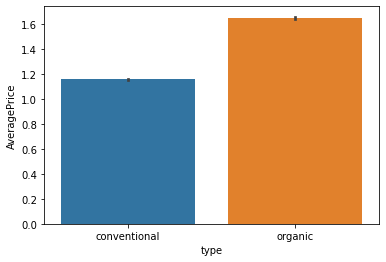

In [34]:
#checking ratio of type and price that which year had max average price
sns.barplot(x = "type" , y = "AveragePrice" ,data=df)

In [74]:
# from the above graph we can see that organic type of avacado is having the more price per unit then conventional

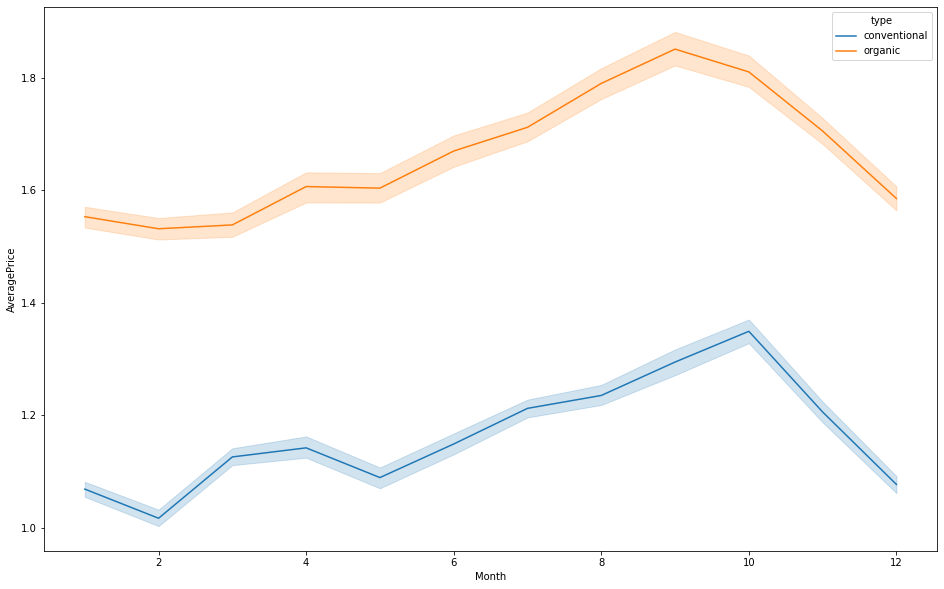

In [35]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

In [76]:
# from the above lineplot graph we can see that here is hike between month 8-10 of both type of avacado

Text(0.5, 1.0, 'relation of Price and Region')

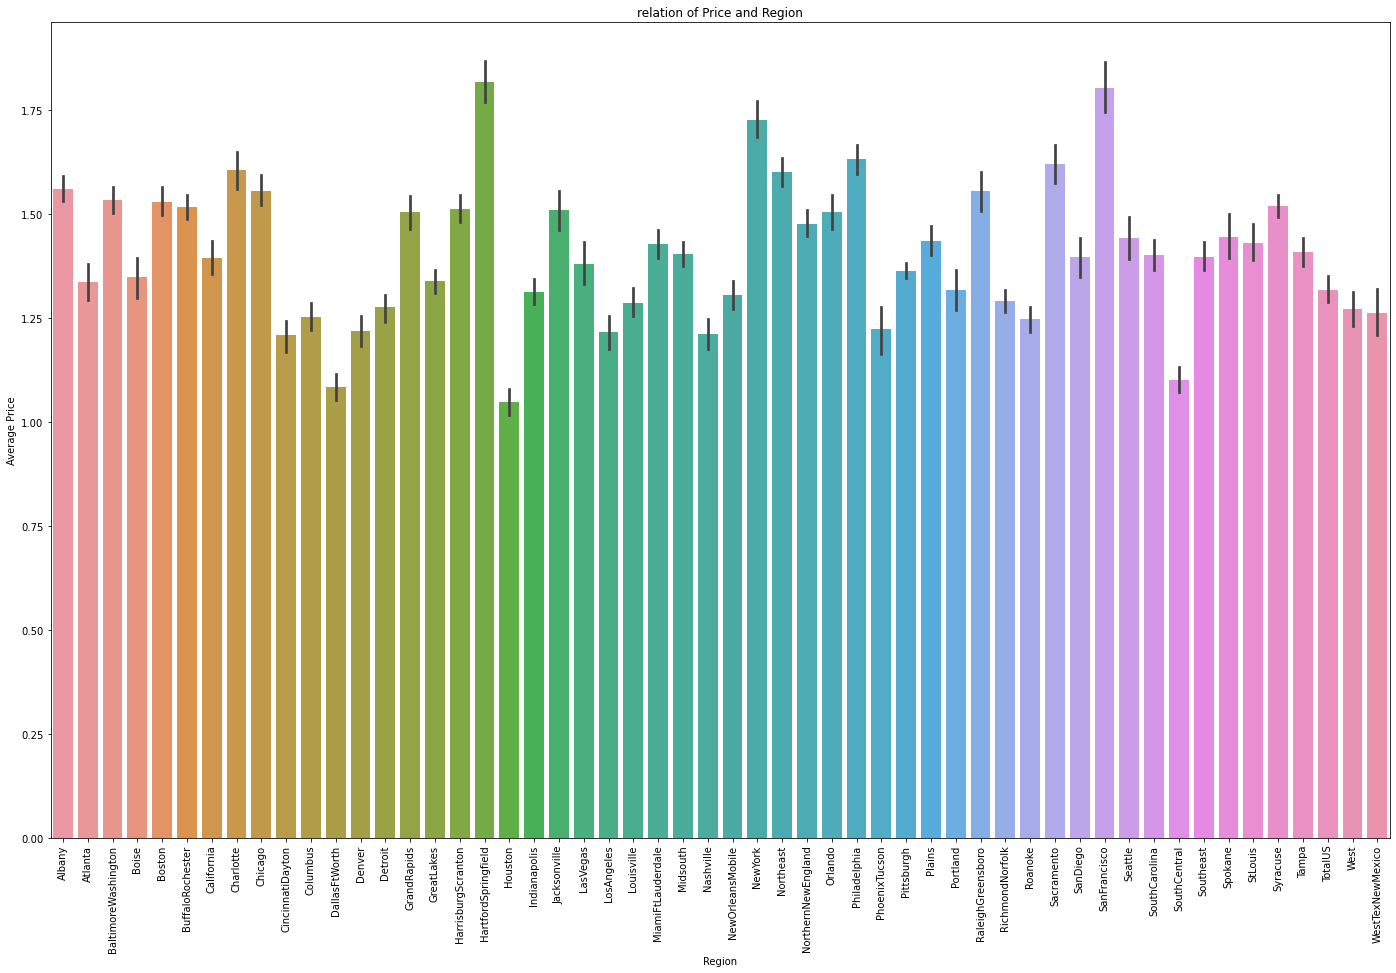

In [36]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('relation of Price and Region')

In [78]:
# from the above graph we can see that HartfordSpringfield ,SanFrancisco and NewYork are having more average price as compared to other region

Text(0.5, 1.0, 'Average_Price')

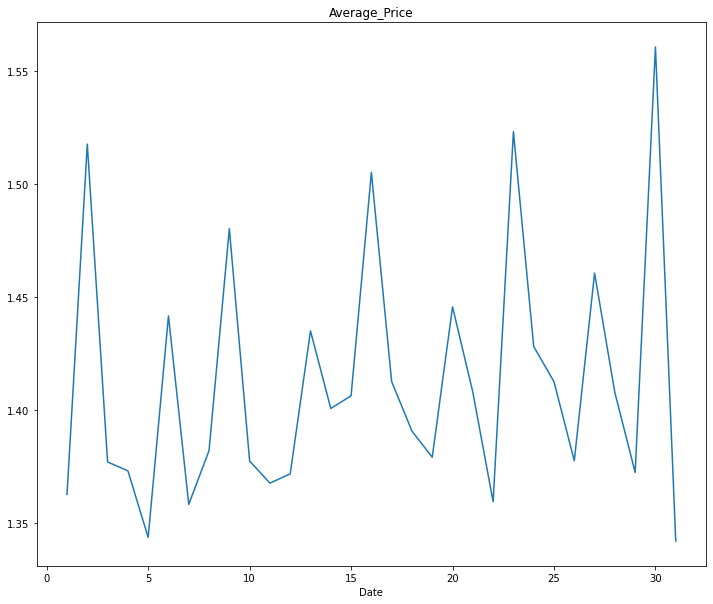

In [37]:
date=df.groupby('Date').mean()
plt.figure(figsize=(12,10))
date['AveragePrice'].plot()
plt.title('Average_Price')

In [ ]:
# from the above graph we can see that on date 28,29 and 30 the price of avacado is high

Text(0.5, 1.0, 'Average_Price')

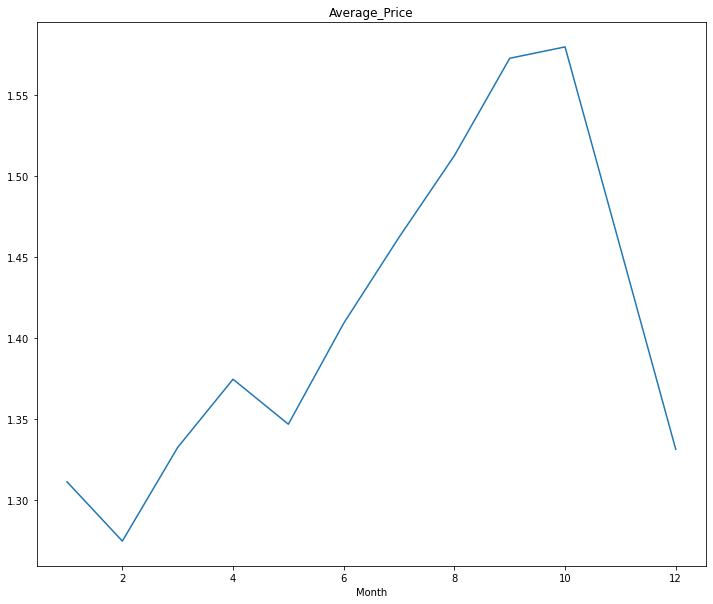

In [38]:
month=df.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')

In [81]:
# from the above graph we can see that in between august to october month the price of avacado is much higher as comapared to other months

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

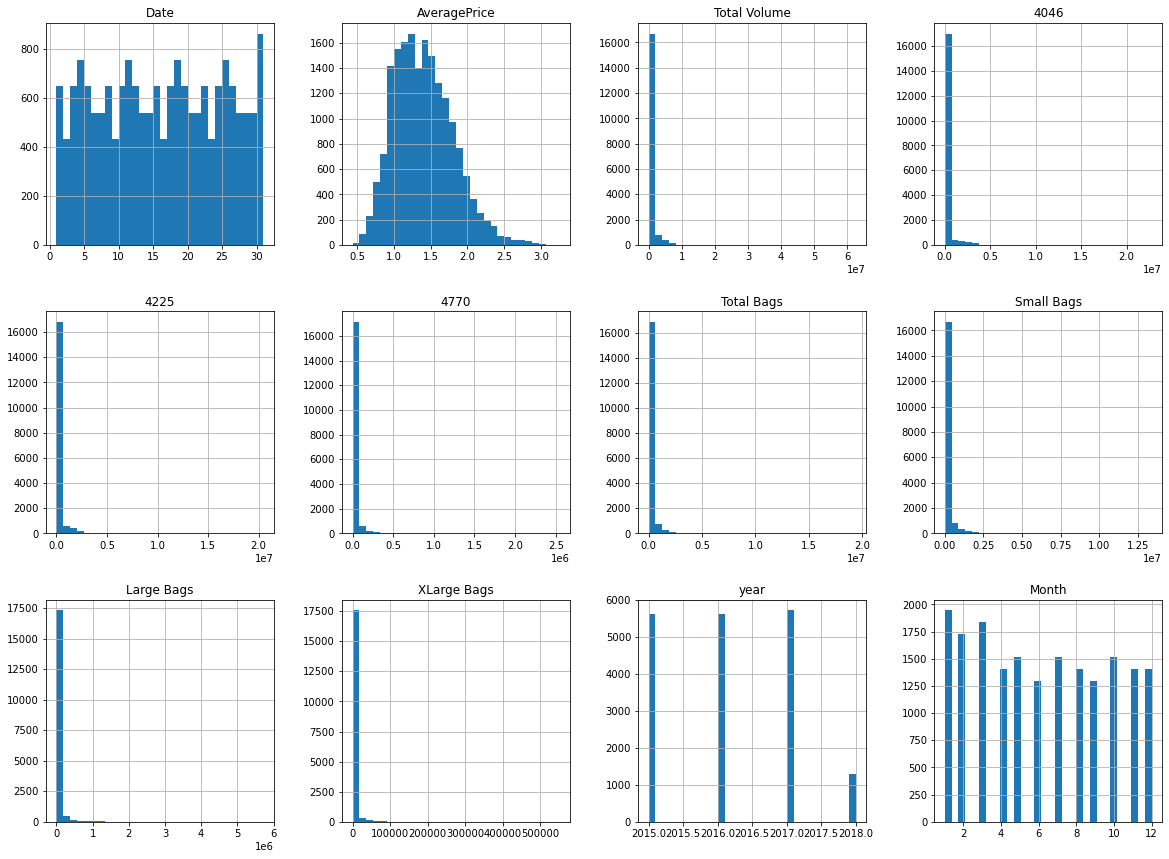

In [39]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [40]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [41]:
#Making the categorical data into numercial for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
dtype: object


In [42]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [43]:
df.type = df.type.astype(float)

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

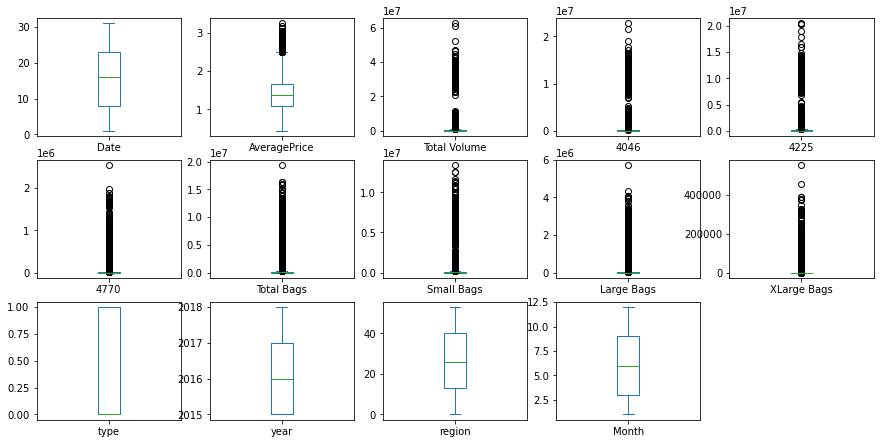

In [44]:
#plotting the boxplot of each column to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [90]:
# we can see the outliers are present in most of the data.

In [45]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

           Date  AveragePrice  Total Volume      4046      4225      4770  \
0      1.291857      0.188689      0.227716  0.230816  0.199902  0.212091   
1      0.494231      0.139020      0.230427  0.231103  0.208054  0.211997   
2      0.303396      1.182069      0.212085  0.231007  0.154478  0.211325   
3      1.101022      0.809551      0.223444  0.230741  0.185350  0.211864   
4      1.519750      0.312861      0.231538  0.230891  0.208719  0.211834   
...         ...           ...           ...       ...       ...       ...   
18244  1.328915      0.556347      0.241373  0.230017  0.243857  0.212540   
18245  1.405803      0.755023      0.242296  0.230693  0.242277  0.212540   
18246  0.608177      1.152375      0.242331  0.230693  0.243090  0.205766   
18247  0.189449      1.301382      0.241625  0.230428  0.242651  0.205774   
18248  0.987075      0.531512      0.241253  0.229347  0.243170  0.210450   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year 

[]

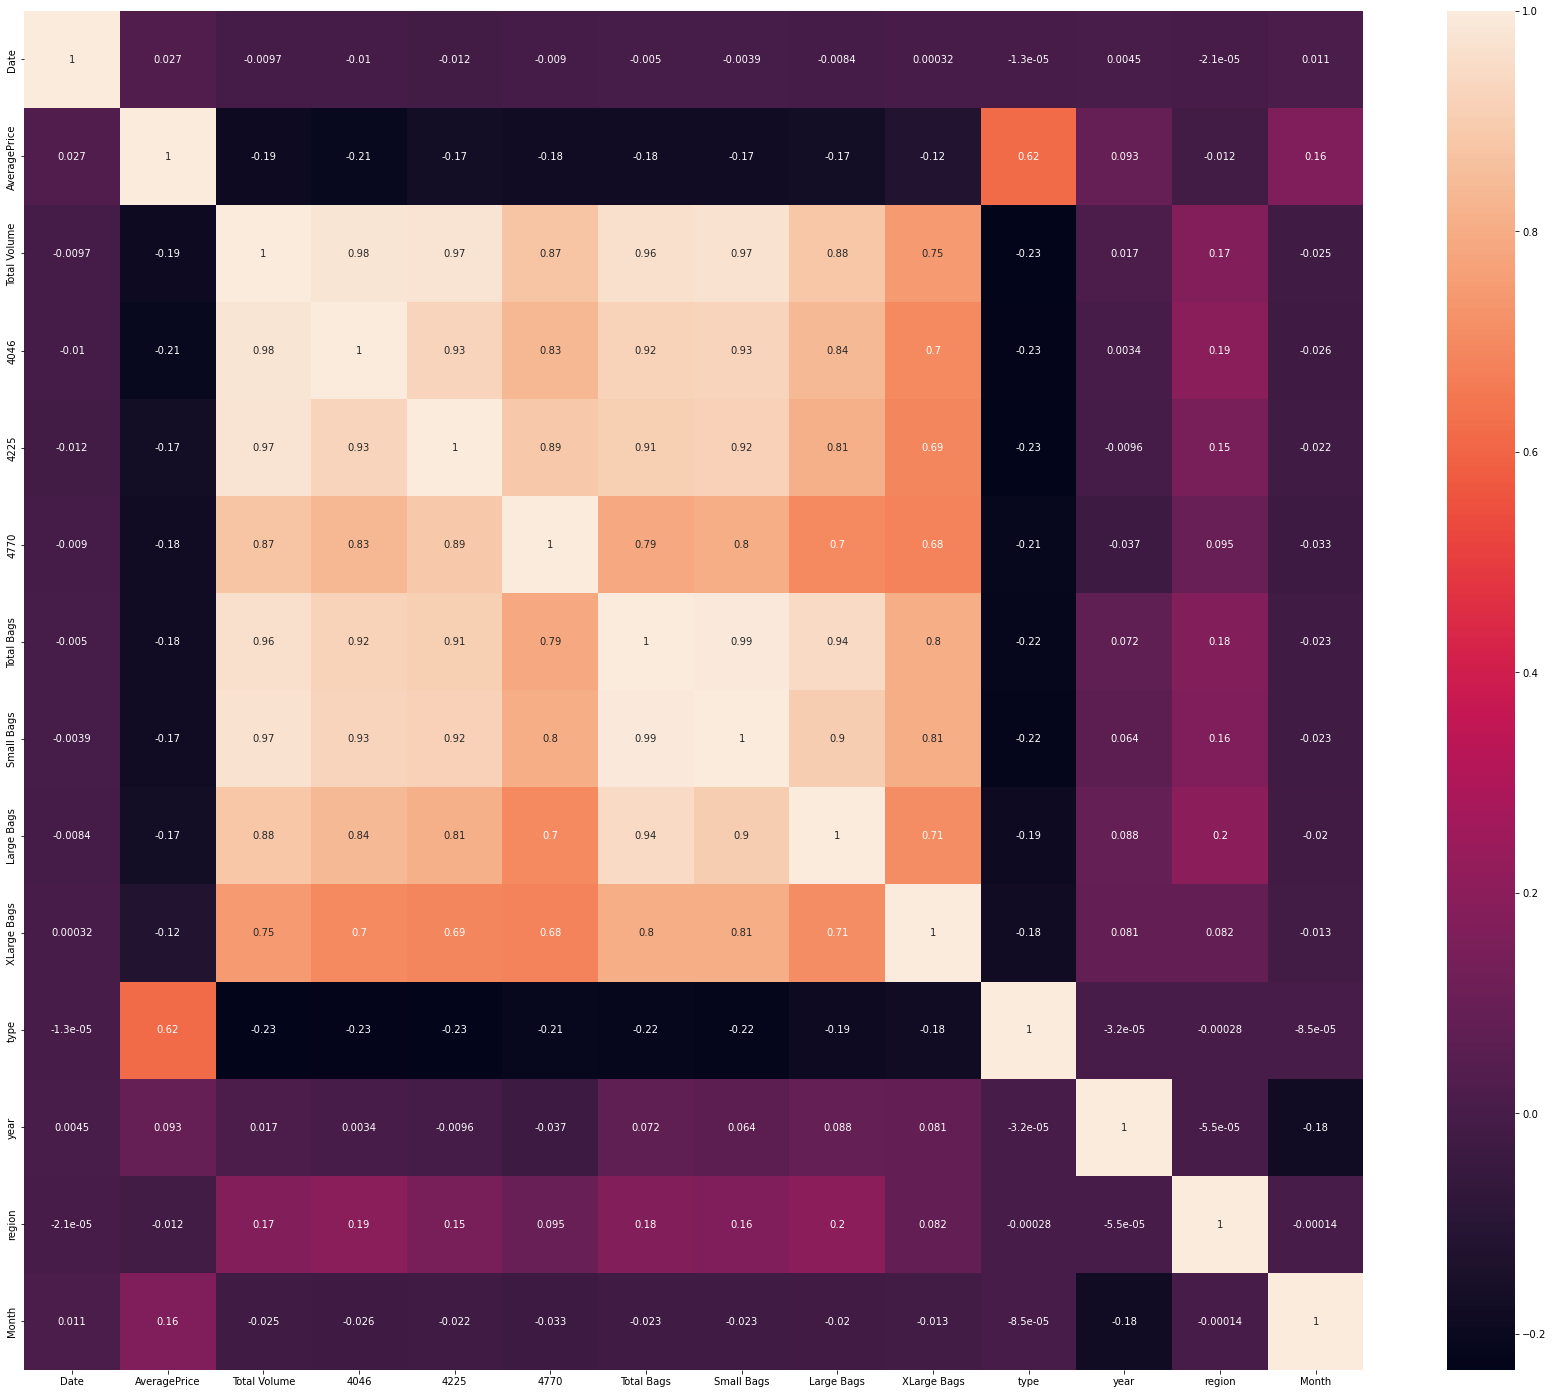

In [46]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [93]:
# we can see that year is most negative co related column among all columns and also the difference is very close of each column

In [47]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [48]:
#Assign the value to df_new which are less the threshold value and removing the outliers
df_new = df[(z<3).all(axis = 1)]

In [55]:
print(df.shape)
print(df_new.shape)
df = df_new
print('Shape after removing outlires',df.shape)

(17651, 14)
(17651, 14)
Shape after removing outlires (17651, 14)


In [56]:
#now finding the mean value of each column 
print(df['4225'].mean())
print(df['Total Bags'].mean())
print(df['Small Bags'].mean())

166445.31769647403
129933.68940410927
101614.60839952317


In [57]:
#replace the outlier value to its mean value to remove outliers
df.loc[df['4225']<3,'4225'] = np.mean(df['4225'])
df.loc[df['Total Bags']<4.8,'Total Bags'] = np.mean(df['Total Bags'])
df.loc[df['Small Bags']<4,'Small Bags'] = np.mean(df['Small Bags'])

In [58]:
df.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455664
4770            5.117170
Total Bags      4.066780
Small Bags      4.222709
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [59]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [60]:
df.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.503957
4770            0.068532
Total Bags     -0.319074
Small Bags     -0.435520
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

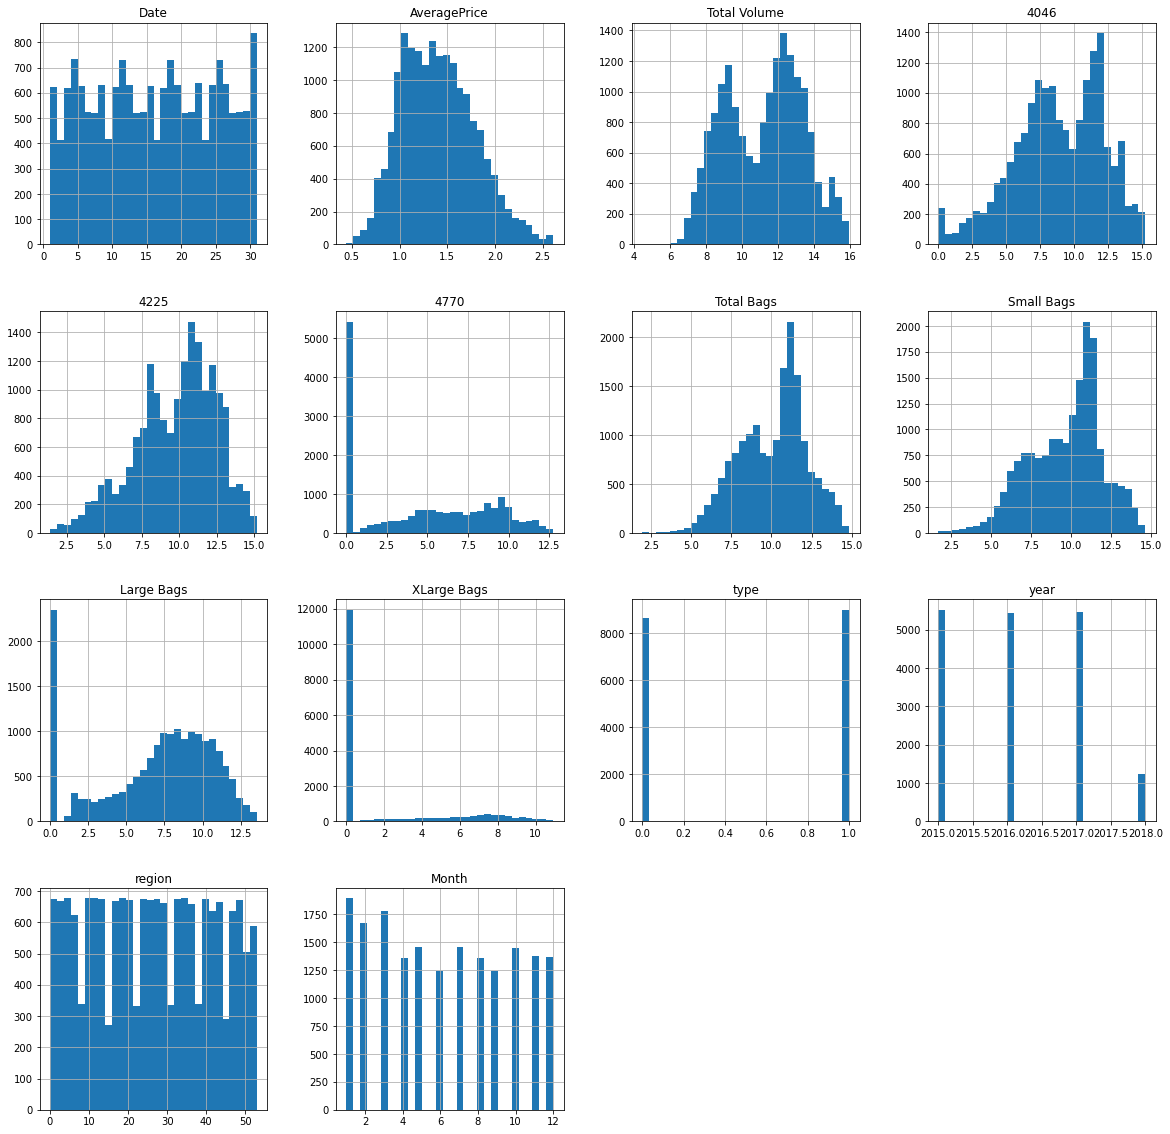

In [61]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [62]:
# we can see that average price, total bags and total volume is well normally distributed data among all column

In [63]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['AveragePrice','Date'])
y = df[["AveragePrice"]]
print(x.shape)
print(y.shape)

(17651, 12)
(17651, 1)


In [64]:
# here we are using Average Price as output variable and useing to do the prediction

In [65]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [66]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is 0.7536699106049486
R2 score correspond to random state  40 is 0.8374592350327745
R2 score correspond to random state  40 is 0.5703923878330162
R2 score correspond to random state  40 is 0.544926432627854
R2 score correspond to random state  40 is 0.7503467423884156
R2 score correspond to random state  41 is 0.733877566294807
R2 score correspond to random state  41 is 0.8281730760420748
R2 score correspond to random state  41 is 0.538577895014404
R2 score correspond to random state  41 is 0.5362877321971128
R2 score correspond to random state  41 is 0.7462086035627709
R2 score correspond to random state  42 is 0.7154109485674857
R2 score correspond to random state  42 is 0.8272814301920477
R2 score correspond to random state  42 is 0.5596577508018745
R2 score correspond to random state  42 is 0.5428506636427334
R2 score correspond to random state  42 is 0.7404599605481431
R2 score correspond to random state  43 is 0.7133544849645626
R2 score co

In [67]:
# max R2 score correspond to random state 88 is 0.841564614027358 and model is KNeighborsRegressor

In [94]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 88,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

{'n_neighbors': 2}

In [72]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 85.77018100881875


In [73]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  0.10102918454935622
Mean squared Error:  0.02156965236051502
Root Mean Absolute Error:  0.31785088414122153


Text(0, 0.5, 'Predicted_Y')

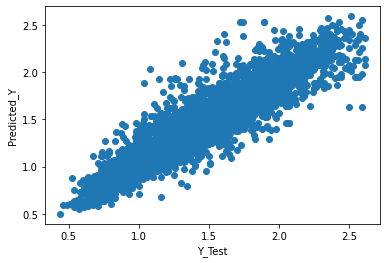

In [74]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [75]:
# in above graph we can see thar it is predicting near to tha actual value and RMSE error is very less

In [76]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [77]:
#assign the value of x and y for training and testing phase
x_c = df.drop(columns=['region','Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(17651, 12)
(17651, 1)


In [78]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [79]:
# here we are taking region as output variable and trying prediction using classification method

In [80]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  40 is 0.7787124463519314
accuracy score correspond to random state  40 is 0.7787124463519314
accuracy score correspond to random state  41 is 0.7785407725321889
accuracy score correspond to random state  41 is 0.783519313304721
accuracy score correspond to random state  42 is 0.7828326180257511
accuracy score correspond to random state  42 is 0.7809442060085837
accuracy score correspond to random state  43 is 0.7847210300429185
accuracy score correspond to random state  43 is 0.7783690987124463
accuracy score correspond to random state  44 is 0.7836909871244635
accuracy score correspond to random state  44 is 0.7788841201716739
accuracy score correspond to random state  45 is 0.7850643776824034
accuracy score correspond to random state  45 is 0.7866094420600859
accuracy score correspond to random state  46 is 0.7910729613733906
accuracy score correspond to random state  46 is 0.7933047210300429
accuracy score correspond to random state  47 is 

In [81]:
# max accuracy score correspond to random state  86 is 0.7962231759656653 and model is KNeighborsClassifier

In [82]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 86,test_size = 0.33)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [83]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 83.84549356223175


In [84]:
#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  80.05164997431949
Mean Score      :  80.05164997431949
STD score       :  0.0


In [85]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 1., ..., 0., 0., 0.])

In [86]:
fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [87]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00454625 1.        ]


[0.         0.75471698 1.        ]


[2. 1. 0.]


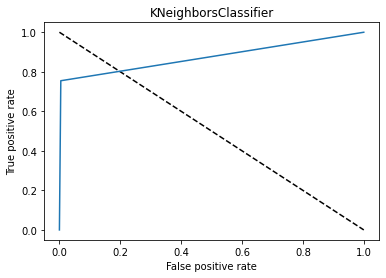

In [88]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

In [95]:
# conclusion:

# taking price as y variable is predicting well for this model as comapared to region
# also r2 score value is also greater then accuracy score

In [98]:
#save the model 
jb.dump(KNN, 'Avacado_Project.pk1')

['Avacado_Project.pk1']